### Implementación y visualización de una regresión lineal múltiple en Python



Nombre: Axel Quiroga


ID: A00832676

Materia: Matemáticas y ciencias de datos para la toma de decisiones


Profesor:  Ivan Martínez Ruiz y Germán Domínguez Solís


Fecha: 11/14/2021


Link: https://colab.research.google.com/drive/15aGHy2SwK-_-ThZ6rXZu2PEFZp7gixP0?usp=sharing

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

datos_consumo = pd.read_excel('A00832676_Registro-1.xlsx')

In [ ]:
datos_consumo.head()

,Fecha (dd/mm/aa),Momento,Nombre alimento,Calorías (kcal),Carbohidratos (g),Lípidos/grasas (g),Proteína (g),Sodio (mg)
0,16/08/2021,Desayuno,Atun en lata,93,2.32,1.00,21.00,260.0
1,16/08/2021,Snack,Rebanada de pastel,340,50.73,14.34,5.04,299.0
2,16/08/2021,Comida,Carne molida,276,1.32,18.58,23.35,400.0
3,16/08/2021,Comida,1 quesadilla,171,10.53,9.90,9.50,409.0
4,16/08/2021,Comida,Ensalada,12,2.77,0.12,0.63,14.0


In [ ]:
datos_consumo.groupby("Momento").count()

,Fecha (dd/mm/aa),Nombre alimento,Calorías (kcal),Carbohidratos (g),Lípidos/grasas (g),Proteína (g),Sodio (mg)
Momento,,,,,,,
Cena,68,68,68,68,68,68,68
Comida,127,127,127,127,127,127,127
Desayuno,75,75,75,75,75,75,75
Snack,15,15,15,15,15,15,15


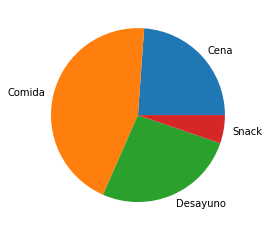

In [ ]:
momentos = ["Cena", "Comida", "Desayuno", "Snack"]
valores_momentos = [68, 127, 75, 15]
plt.pie(valores_momentos, labels=momentos)
plt.show()

In [ ]:
datos_consumo.describe()

,Calorías (kcal),Carbohidratos (g),Lípidos/grasas (g),Proteína (g),Sodio (mg)
count,285.000000,285.000000,285.000000,285.000000,285.000000
mean,209.957895,20.639860,8.541965,11.910807,318.444912
std,134.960368,22.223109,10.574901,11.430851,346.628131
min,12.000000,0.070000,0.080000,0.360000,0.900000
25%,93.000000,2.860000,1.000000,2.350000,30.000000
50%,221.000000,18.000000,6.000000,9.060000,242.000000
75%,297.000000,30.000000,13.210000,17.000000,512.000000
max,950.000000,200.000000,121.200000,70.000000,1810.000000


In [ ]:
datos_seleccionados = datos_consumo.iloc[:,3:8]
datos_seleccionados.head()

,Calorías (kcal),Carbohidratos (g),Lípidos/grasas (g),Proteína (g),Sodio (mg)
0,93,2.32,1.00,21.00,260.0
1,340,50.73,14.34,5.04,299.0
2,276,1.32,18.58,23.35,400.0
3,171,10.53,9.90,9.50,409.0
4,12,2.77,0.12,0.63,14.0


In [ ]:
datos_seleccionados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 285 entries, 0 to 284
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Calorías (kcal)     285 non-null    int64  
 1   Carbohidratos (g)   285 non-null    float64
 2   Lípidos/grasas (g)  285 non-null    float64
 3   Proteína (g)        285 non-null    float64
 4   Sodio (mg)          285 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 11.3 KB


In [ ]:
datos_seleccionados.isnull().values.any()

False

In [ ]:
datos_seleccionados.isnull().sum()

Calorías (kcal)       0
Carbohidratos (g)     0
Lípidos/grasas (g)    0
Proteína (g)          0
Sodio (mg)            0
dtype: int64

In [ ]:
datos_seleccionados.columns #ver nombres de las columnas

X = datos_seleccionados[['Carbohidratos (g)', 'Lípidos/grasas (g)',
       'Proteína (g)', 'Sodio (mg)']].values #variables independientes

y = datos_seleccionados['Calorías (kcal)'].values #variable dependiente

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) #20 de prueba

In [ ]:
modelo_regresion_Lin = LinearRegression()
modelo_regresion_Log = LogisticRegression() #Quisiera ver como cambia la exactitud con una regresion logistica

In [ ]:
modelo_regresion_Lin.fit(X_train, y_train)
modelo_regresion_Log.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
#Regresion lineal
x_columns_Lin = ['Carbohidratos (g)', 'Lípidos/grasas (g)', 'Proteína (g)', 'Sodio (mg)']
coeff_df_Lin = pd.DataFrame(modelo_regresion_Lin.coef_, x_columns_Lin, columns=['Coeficientes'])
coeff_df_Lin

,Coeficientes
Carbohidratos (g),2.230225
Lípidos/grasas (g),4.169770
Proteína (g),1.092290
Sodio (mg),0.151956


In [ ]:
y_pred = modelo_regresion_Lin.predict(X_test) # R. lineal

In [ ]:
y_pred_Log = modelo_regresion_Log.predict(X_test) # R. log

In [ ]:
validacion = pd.DataFrame({'Actual': y_test, 'Predicción': y_pred, 'Diferencia': y_test-y_pred})
muestra_validacion = validacion.head(8)
muestra_validacion

,Actual,Predicción,Diferencia
0,12,77.607992,-65.607992
1,288,126.213703,161.786297
2,250,281.889999,-31.889999
3,12,77.607992,-65.607992
4,93,139.905009,-46.905009
5,288,257.338962,30.661038
6,65,98.480490,-33.480490
7,288,126.213703,161.786297


In [ ]:
validacion["Diferencia"].describe()

count     57.000000
mean      -6.029116
std       70.687310
min     -128.402609
25%      -55.389670
50%      -31.889999
75%       29.331546
max      226.741840
Name: Diferencia, dtype: float64

In [ ]:
r2_score(y_test, y_pred)

0.7307837470600276

In [ ]:
validacion_Log = pd.DataFrame({'Actual': y_test, 'Predicción': y_pred_Log, 'Diferencia': y_test-y_pred_Log})
muestra_validacion_Log = validacion_Log.head(8)
muestra_validacion_Log

,Actual,Predicción,Diferencia
0,12,204,-192
1,288,300,-12
2,250,367,-117
3,12,204,-192
4,93,93,0
5,288,300,-12
6,65,510,-445
7,288,300,-12


In [ ]:
validacion_Log["Diferencia"].describe()

count     57.000000
mean     -78.824561
std      149.848748
min     -445.000000
25%     -192.000000
50%      -12.000000
75%        0.000000
max      296.000000
Name: Diferencia, dtype: float64

In [ ]:
r2_score(y_test, y_pred_Log)

-0.5391775286067784

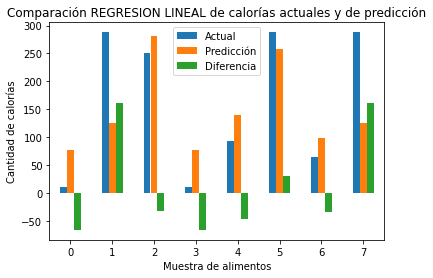

In [ ]:
muestra_validacion.plot.bar(rot=0)  # crear el grafico con los vlaores de la validacion

plt.title("Comparación REGRESION LINEAL de calorías actuales y de predicción") # titulo

plt.xlabel("Muestra de alimentos") # eje x

plt.ylabel("Cantidad de calorías") # eje y

plt.show()

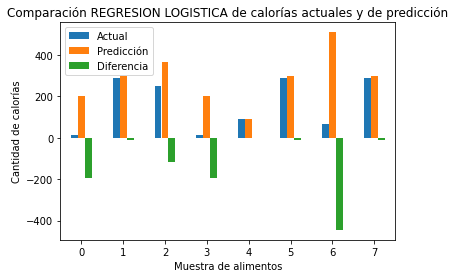

In [ ]:
muestra_validacion_Log.plot.bar(rot=0)  # crear el grafico con los vlaores de la validacion

plt.title("Comparación REGRESION LOGISTICA de calorías actuales y de predicción") # titulo

plt.xlabel("Muestra de alimentos") # eje x

plt.ylabel("Cantidad de calorías") # eje y

plt.show()